## Braille Script - Digits Recognition

https://en.wikipedia.org/wiki/Braille

Braille is a tactile writing system used by people who are visually impaired. It is traditionally written with embossed paper. Braille users can read computer screens and other electronic supports using refreshable braille displays. They can write braille with the original slate and stylus or type it on a braille writer, such as a portable braille notetaker or computer that prints with a braille embosser.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing all necessary libraries 
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization,Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten
import tensorflow as tf
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import expand_dims

Using TensorFlow backend.


In [0]:
# get images from drive
images = glob.glob("/content/drive/My Drive/DLCP/braille_script/braille_digits"+"/*.png")

In [0]:
# sort images 
images.sort()

In [5]:
images

['/content/drive/My Drive/DLCP/braille_script/braille_digits/b0.png',
 '/content/drive/My Drive/DLCP/braille_script/braille_digits/b1.png',
 '/content/drive/My Drive/DLCP/braille_script/braille_digits/b2.png',
 '/content/drive/My Drive/DLCP/braille_script/braille_digits/b3.png',
 '/content/drive/My Drive/DLCP/braille_script/braille_digits/b4.png',
 '/content/drive/My Drive/DLCP/braille_script/braille_digits/b5.png',
 '/content/drive/My Drive/DLCP/braille_script/braille_digits/b6.png',
 '/content/drive/My Drive/DLCP/braille_script/braille_digits/b7.png',
 '/content/drive/My Drive/DLCP/braille_script/braille_digits/b8.png',
 '/content/drive/My Drive/DLCP/braille_script/braille_digits/b9.png']

In [0]:
# convert images to grayscale and resize to 28X28
images_array = []
for img in images:
    img = Image.open(img)
    # img = img.convert('RGB')
    img = img.convert('L')
    img = img.resize((28,28), Image.ANTIALIAS)
    images_array.append(np.array(img))
images_array = np.array(images_array)

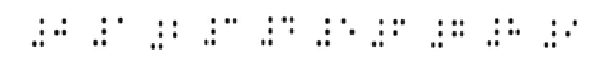

In [7]:
# plot images
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(images_array[i],cmap="gray")
    plt.axis("off")

In [0]:
# create a large dataset with duplicates 
final_array = []
labels_array = []
for i,img in enumerate(images_array):
    for j in range(10000):
        final_array.append(img)
        labels_array.append(i)
final_array = np.array(final_array)
labels_array = np.array(labels_array)

In [0]:
# split the dataset into train and test
trainX,testX,trainy,testy = train_test_split(final_array,labels_array,shuffle=True)

In [0]:
# reshape to be [samples][width][height][channels]
X_train = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32')
X_test = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32')
# X_train = trainX.reshape(-1,28,28,1)
# X_test = testX.reshape(-1,28,28,1)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# convert
Y_train = tf.keras.utils.to_categorical(trainy, num_classes=10)
Y_test = tf.keras.utils.to_categorical(testy, num_classes=10)

In [11]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(75000, 28, 28, 1) (25000, 28, 28, 1) (75000, 10) (25000, 10)


## Image agumentation

In [12]:
train_image_gen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=90,
    horizontal_flip=True, 
    vertical_flip=True,
    # rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2)
test_image_gen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=90,
    horizontal_flip=True, 
    vertical_flip=True,
    # rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2)

train_image_gen.fit(X_train, augment=True)
test_image_gen.fit(X_test, augment=True)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


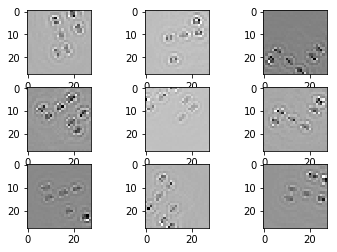

In [13]:
# plot images
for X_batch, y_batch in train_image_gen.flow(X_train, trainy, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [0]:
# lets set epochs and batch_size values
epochs = 10
batch_size = 128

## CNN

In [15]:
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))
# model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28)))
model.add(tf.keras.layers.Conv2D(128,kernel_size=(2,2), input_shape =(28,28,1), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,kernel_size=(2,2), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32,kernel_size=(2,2), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,kernel_regularizer = tf.keras.regularizers.l2(0.01), activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 128)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          256       
____

In [0]:
# Build CNN
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [18]:
checkpint = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/DLCP/braille_script/brallie_digits_model.h5",save_best_only=True,verbose=1,monitor="val_acc",mode="max")
stoperly = tf.keras.callbacks.EarlyStopping(monitor="val_loss",mode="auto",verbose=1)
callbaklist = [checkpint,stoperly]
# model_history = model.fit(X_train_m3,trainy,validation_data=(X_test_m3,testy),epochs=10,batch_size=128,callbacks=callbaklist)
model_history = model.fit_generator(train_image_gen.flow(X_train, Y_train, batch_size=batch_size),validation_data=test_image_gen.flow(X_test, Y_test, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size,validation_steps=len(X_test)/batch_size, epochs = 30,verbose = 1,callbacks=callbaklist)

Epoch 1/30
585/585 [============================>.] - ETA: 0s - loss: 1.5446 - acc: 0.5491
Epoch 00001: val_acc improved from -inf to 0.65956, saving model to /content/drive/My Drive/DLCP/braille_script/brallie_digits_model.h5
586/585 [==============================] - 65s 112ms/step - loss: 1.5447 - acc: 0.5491 - val_loss: 1.2743 - val_acc: 0.6596
Epoch 2/30
585/585 [============================>.] - ETA: 0s - loss: 1.1648 - acc: 0.6765
Epoch 00002: val_acc improved from 0.65956 to 0.77272, saving model to /content/drive/My Drive/DLCP/braille_script/brallie_digits_model.h5
586/585 [==============================] - 63s 108ms/step - loss: 1.1645 - acc: 0.6766 - val_loss: 0.9312 - val_acc: 0.7727
Epoch 3/30
585/585 [============================>.] - ETA: 0s - loss: 0.9139 - acc: 0.7526
Epoch 00003: val_acc improved from 0.77272 to 0.81152, saving model to /content/drive/My Drive/DLCP/braille_script/brallie_digits_model.h5
586/585 [==============================] - 64s 109ms/step - loss:

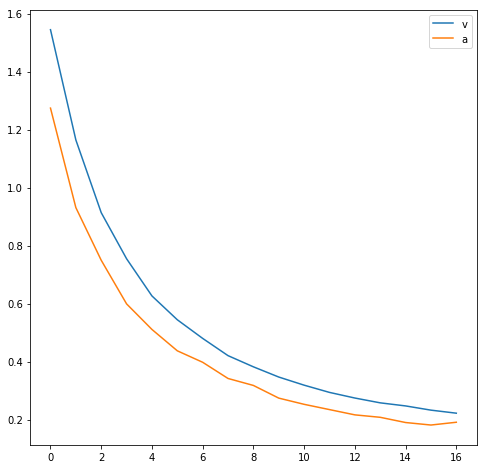

In [19]:
# plot train and test loss
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(model_history.history["loss"])
ax.legend("loss")
ax.plot(model_history.history["val_loss"])
ax.legend("val_loss")

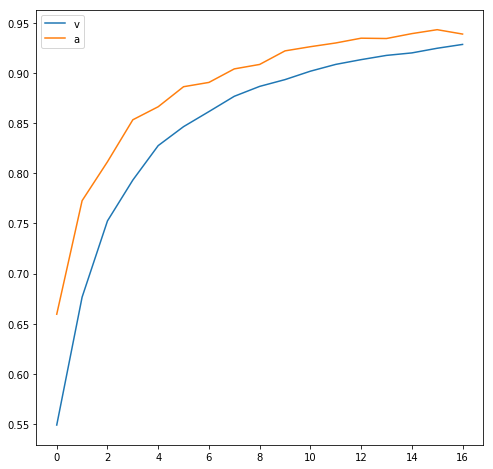

In [20]:
# plot train and test accuracy
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(model_history.history["acc"])
ax.legend("acc")
ax.plot(model_history.history["val_acc"])
ax.legend("val_acc")

In [21]:
# predict test accuracy
scores = model.evaluate(test_image_gen.flow(X_test, Y_test, batch_size=batch_size), verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.19335725192664838
Test accuracy: 0.93736


In [0]:
# make a prediction using test-time augmentation
def tta_prediction(datagen, model, image, n_examples):
	# convert image into dataset
	samples = expand_dims(image, 0)
	# prepare iterator
	it = datagen.flow(samples, batch_size=n_examples)
	# make predictions for each augmented image
	yhats = model.predict_generator(it, steps=n_examples, verbose=0)
	# sum across predictions
	summed = np.sum(yhats, axis=0)
	# argmax across classes
	return np.argmax(summed)

In [23]:
# plot and print model prediciton 
#plt.figure(figsize=(10, 1))
for index in np.random.choice(25000,10):
    img = X_test[index]
    # plt.subplot(1,10,index+1)
    # plt.imshow(img,cmap="gray")
    # plt.axis("off")
    print("truth:",np.argmax(Y_test[index]))
    pred = tta_prediction(train_image_gen,model,img,7)
    print("prediction:",pred)

truth: 8
prediction: 8
truth: 9
prediction: 9
truth: 0
prediction: 0
truth: 1
prediction: 1
truth: 4
prediction: 4
truth: 4
prediction: 4
truth: 3
prediction: 3
truth: 5
prediction: 5
truth: 9
prediction: 9
truth: 5
prediction: 5


In [0]:
# from keras.models import load_model
# model = load_model('brallie_model.h5')
# model.load_weights('/content/drive/My Drive/DLCP/brallie_script/brallie_model.h5')
# pred = model.predict(X_test_m3[467].reshape(1,28,28,1))

# plt.figure(figsize=(10, 1))
# for index in np.random.choice(25000,10):
#     img = Image.open('data/' + str(index) + '.png').convert("L")
#     img = img.resize((28,28))
#     im2arr = np.array(img)
#     im2arr = X_test_m3[index]
#     im2arr = im2arr.reshape(1,28,28,1)
#     Predicting the Test set results
#     y_pred = model.predict(im2arr,batch_size=128)